In [1]:
import numpy as np
import pandas as pd
from numpy import *
import math
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api
from statsmodels.tsa.stattools import coint
import seaborn as sns
import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
stock_list = ['COIN',
'NVDA',
'RSX',
'ARKG',
'IEFA']
start_date = '2012-01-01'
end_date = '2022-03-01'
prices_df =yf.download(stock_list, start = start_date,
                   end = end_date)
prices_df

[*********************100%***********************]  5 of 5 completed


Adj Close                                                \
                 ARKG        COIN       IEFA        NVDA        RSX   
Date                                                                  
2012-01-03        NaN         NaN        NaN    3.223995  18.849510   
2012-01-04        NaN         NaN        NaN    3.260736  18.883631   
2012-01-05        NaN         NaN        NaN    3.377846  18.549225   
2012-01-06        NaN         NaN        NaN    3.338810  18.480976   
2012-01-09        NaN         NaN        NaN    3.338810  18.651590   
...               ...         ...        ...         ...        ...   
2022-02-22  44.230000  176.759995  70.269997  233.860153  20.969999   
2022-02-23  42.680000  172.740005  69.720001  223.831863  19.020000   
2022-02-24  45.990002  179.559998  68.769997  237.439545  15.390000   
2022-02-25  47.470001  176.830002  70.500000  241.528854  15.600000   
2022-02-28  48.380001  190.770004  69.290001  243.808472  10.850000   

                Close                                                ...  \
                 ARKG        COIN       IEFA        NVDA        RSX  ...   
Date                                                                 ...   
2012-01-03        NaN         NaN        NaN    3.510000  27.620001  ...   
2012-01-04        NaN         NaN        NaN    3.550000  27.670000  ...   
2012-01-05        NaN         NaN        NaN    3.677500  27.180000  ...   
2012-01-06        NaN         NaN        NaN    3.635000  27.080000  ...   
2012-01-09        NaN         NaN        NaN    3.635000  27.330000  ...   
...               ...         ...        ...         ...        ...  ...   
2022-02-22  44.230000  176.759995  70.269997  233.899994  20.969999  ...   
2022-02-23  42.680000  172.740005  69.720001  223.869995  19.020000  ...   
2022-02-24  45.990002  179.559998  68.769997  237.479996  15.390000  ...   
2022-02-25  47.470001  176.830002  70.500000  241.570007  15.600000  ...   
2022-02-28  48.380001  190.770004  69.290001  243.850006  10.850000  ...   

                 Open                                                \
                 ARKG        COIN       IEFA        NVDA        RSX   
Date                                                                  
2012-01-03        NaN         NaN        NaN    3.575000  27.559999   
2012-01-04        NaN         NaN        NaN    3.512500  27.450001   
2012-01-05        NaN         NaN        NaN    3.532500  27.360001   
2012-01-06        NaN         NaN        NaN    3.675000  27.480000   
2012-01-09        NaN         NaN        NaN    3.637500  27.379999   
...               ...         ...        ...         ...        ...   
2022-02-22  44.689999  180.869995  70.489998  230.350006  20.320000   
2022-02-23  44.799999  180.690002  71.010002  238.020004  20.070000   
2022-02-24  40.630001  159.080002  67.209999  210.149994  14.510000   
2022-02-25  45.919998  180.240005  69.449997  237.210007  17.040001   
2022-02-28  47.369999  172.500000  69.139999  239.919998  12.490000   

               Volume                                             
                 ARKG       COIN        IEFA      NVDA       RSX  
Date                                                              
2012-01-03        NaN        NaN         NaN  46804400   3520500  
2012-01-04        NaN        NaN         NaN  34737200   2325900  
2012-01-05        NaN        NaN         NaN  56354800   5389700  
2012-01-06        NaN        NaN         NaN  53325200   4241000  
2012-01-09        NaN        NaN         NaN  50824400   4092000  
...               ...        ...         ...       ...       ...  
2022-02-22  3911000.0  4472800.0  13919000.0  63342200  37251400  
2022-02-23  2896200.0  3892500.0  12956000.0  56651100  22500800  
2022-02-24  4737800.0  8134000.0  22603600.0  73580100  58822000  
2022-02-25  3981900.0  6836800.0  13282700.0  52886600  26110400  
2022-02-28  3922700.0  8036300.0  16700800.0  47731900  50511000  

[2556 rows x 30 co

In [3]:
def find_cointegrated_pairs(dataframe):
    n = dataframe.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = dataframe.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            stock1 = dataframe[keys[i]]
            stock2 = dataframe[keys[j]]
            result = statsmodels.tsa.stattools.coint(stock1, stock2)
            pvalue = result[1]
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j], pvalue))

    return pvalue_matrix, pairs

In [4]:
stock_list = ['COIN',
'NVDA',
'RSX',
'ARKG',
'IEFA']
start_date = '2012-01-01'
end_date = '2022-03-01'
prices_df =yf.download(stock_list, start = start_date,
                   end = end_date)["Close"]
prices_df

[*********************100%***********************]  5 of 5 completed


,ARKG,COIN,IEFA,NVDA,RSX
Date,,,,,
2012-01-03,NaN,NaN,NaN,3.510000,27.620001
2012-01-04,NaN,NaN,NaN,3.550000,27.670000
2012-01-05,NaN,NaN,NaN,3.677500,27.180000
2012-01-06,NaN,NaN,NaN,3.635000,27.080000
2012-01-09,NaN,NaN,NaN,3.635000,27.330000
...,...,...,...,...,...
2022-02-22,44.230000,176.759995,70.269997,233.899994,20.969999
2022-02-23,42.680000,172.740005,69.720001,223.869995,19.020000
2022-02-24,45.990002,179.559998,68.769997,237.479996,15.390000


In [5]:
stocks_returns = np.log(prices_df/prices_df.shift(1))

print('\nCorrelation Matrix')
corr_matrix = stocks_returns.corr()
print (corr_matrix)


Correlation Matrix
          ARKG      COIN      IEFA      NVDA       RSX
ARKG  1.000000  0.473117  0.526818  0.533338  0.305990
COIN  0.473117  1.000000  0.327549  0.418787  0.072367
IEFA  0.526818  0.327549  1.000000  0.482356  0.607520
NVDA  0.533338  0.418787  0.482356  1.000000  0.306183
RSX   0.305990  0.072367  0.607520  0.306183  1.000000


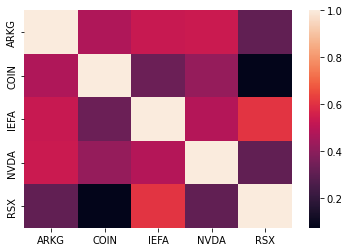

In [6]:
sns.heatmap(corr_matrix);

In [7]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

print("\nTop Absolute Correlations")
print(get_top_abs_correlations(stocks_returns))


Top Absolute Correlations
IEFA  RSX     0.607520
ARKG  NVDA    0.533338
      IEFA    0.526818
IEFA  NVDA    0.482356
ARKG  COIN    0.473117
COIN  NVDA    0.418787
      IEFA    0.327549
NVDA  RSX     0.306183
ARKG  RSX     0.305990
COIN  RSX     0.072367
dtype: float64


[('IEFA', 'RSX', 0.01882435260242233)]


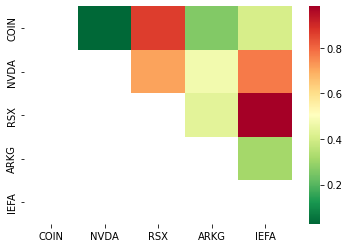

In [8]:
prices_df = prices_df.dropna()
pvalues, pairs = find_cointegrated_pairs(prices_df)
sns.heatmap(1-pvalues, xticklabels=stock_list, yticklabels=stock_list, cmap='RdYlGn_r', mask = (pvalues == 1))
print (pairs)

In [9]:
prices_df =yf.download(['NVDA'], start = start_date,
                   end = end_date)
prices_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,3.575000,3.600000,3.502500,3.510000,3.223995,46804400
2012-01-04,3.512500,3.565000,3.480000,3.550000,3.260736,34737200
2012-01-05,3.532500,3.695000,3.517500,3.677500,3.377846,56354800
2012-01-06,3.675000,3.677500,3.592500,3.635000,3.338810,53325200
2012-01-09,3.637500,3.705000,3.610000,3.635000,3.338810,50824400
...,...,...,...,...,...,...
2022-02-22,230.350006,240.639999,230.000000,233.899994,233.860153,63342200
2022-02-23,238.020004,241.550003,223.009995,223.869995,223.831863,56651100
2022-02-24,210.149994,238.000000,208.899994,237.479996,237.439545,73580100


In [10]:
prices_df['avg_price'] = prices_df.apply (lambda row:(row['Open']+row['High']+row['Low']+row['Close'])/4, axis=1)
prices_df

,Open,High,Low,Close,Adj Close,Volume,avg_price
Date,,,,,,,
2012-01-03,3.575000,3.600000,3.502500,3.510000,3.223995,46804400,3.546875
2012-01-04,3.512500,3.565000,3.480000,3.550000,3.260736,34737200,3.526875
2012-01-05,3.532500,3.695000,3.517500,3.677500,3.377846,56354800,3.605625
2012-01-06,3.675000,3.677500,3.592500,3.635000,3.338810,53325200,3.645000
2012-01-09,3.637500,3.705000,3.610000,3.635000,3.338810,50824400,3.646875
...,...,...,...,...,...,...,...
2022-02-22,230.350006,240.639999,230.000000,233.899994,233.860153,63342200,233.722500
2022-02-23,238.020004,241.550003,223.009995,223.869995,223.831863,56651100,231.612499
2022-02-24,210.149994,238.000000,208.899994,237.479996,237.439545,73580100,223.632496


In [16]:
X = prices_df['avg_price']
y = prices_df['Close']

In [17]:
size = int(len(y) * 0.66)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

size = int(len(y) * 0.66)
trainX, testX = X[0:size], X[size:len(X)]
trainY, testY = y[0:size], y[size:len(X)]

# sacling data
scaler_in = MinMaxScaler()  #  for inputs
scaler_out = MinMaxScaler()  # for outputs

X_train = scaler_in.fit_transform(np.array(trainX).reshape(-1,1))
y_train = scaler_out.fit_transform(np.array(trainY).reshape(-1,1))

X_test = scaler_in.transform(np.array(testX).reshape(-1,1))
y_test = scaler_out.transform(np.array(testY).reshape(-1,1))


param_grid = {"C": np.linspace(10**(-2),10**3,100),
             'gamma': np.linspace(0.0001,1,20)}

mod = SVR(epsilon = 0.1,kernel='rbf')
model = GridSearchCV(estimator = mod, param_grid = param_grid,
                                   scoring = "neg_mean_squared_error",verbose = 0)


In [19]:
import matplotlib.pyplot as plt
predicted = []

for i in range(0,400,60):
    best_model = model.fit(X_train, y_train.ravel())
    #prediction
    predicted_te = model.predict(X_test[i:i+60])
    for h in predicted_te: 
        predicted.append(h)
    print(predicted_te)
    X_train = np.concatenate((X_train,X_test[i:i+60]),axis = 0)
    y_train = np.concatenate((y_train,y_test[i:i+60]),axis = 0)
    print(X_train.size)
    print(y_train.size)


# inverse_transform because prediction is done on scaled inputs
#predicted_te = scaler_out.inverse_transform(predicted_te.reshape(-1,1))

[0.88264397 0.87963579 0.87546774 0.86757133 0.85522548 0.85139496
 0.84521124 0.85879927 0.85948178 0.85877021 0.88499291 0.9144661
 0.91797704 0.91448048 0.89922208 0.8771976  0.85327782 0.85220925
 0.81839378 0.77692668 0.79317968 0.77957435 0.78491087 0.79400164
 0.78484474 0.76371845 0.75170547 0.72028256 0.68821149 0.66409779
 0.65502621 0.63652939 0.64310775 0.6866659  0.70078339 0.70728986
 0.69386436 0.69397575 0.70081306 0.68337341 0.67279834 0.64644802
 0.65181469 0.66146189 0.65918294 0.55449536 0.51923006 0.48758781
 0.50821582 0.49506564 0.51175993 0.51949229 0.53347949 0.53575674
 0.54007129 0.57294061 0.54720902 0.52379283 0.51744685 0.50666478]
1746
1746
[0.51590451 0.50856483 0.51277835 0.50466092 0.49594719 0.50248624
 0.48843447 0.47295816 0.46083672 0.44299321 0.45173655 0.45179691
 0.46208191 0.46549321 0.4636215  0.45550161 0.46299509 0.48462925
 0.48989922 0.48886484 0.49123564 0.50191991 0.50816463 0.5155043
 0.51295202 0.51162303 0.52772166 0.51860024 0.514590

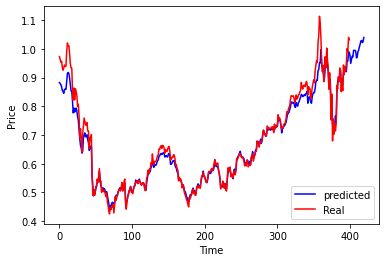

In [20]:

#plot
plt.plot(predicted, color = 'blue', label = 'predicted')
plt.plot(y_test[0:400], color = 'red', label = 'Real')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

#error
# print("MSE: ", mse(real,forcast), " R2: ", r2_score(real,forcast))
# print(best_model.best_params_)